### **Verify Kinematic Map Using Solidworks**

A0 0.0
A1 -0.0
B0 0.0
B1 0.0
B2 0.0
B3 0.0
B4 -0.0
B5 0.0
C0 -0.0
C1 0.0
C2 -0.0
D0 1e-10
D1 1e-10


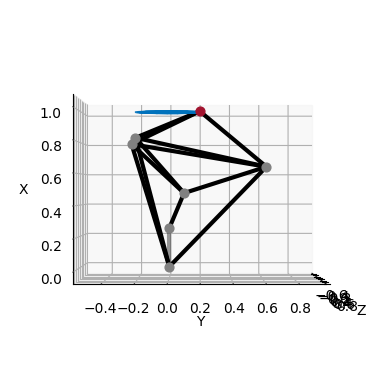

A: 0.2500 B: 0.5590 C: 0.9014 D: 0.9239 Lc: 1.0000 Ht: 0.2500 Dt: 0.5000 Gt: 90.0000


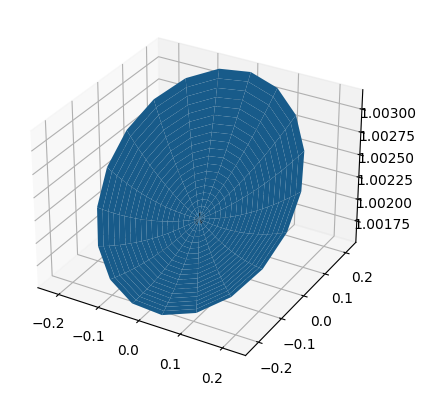

[1.00306922 0.19743731 0.09415911]


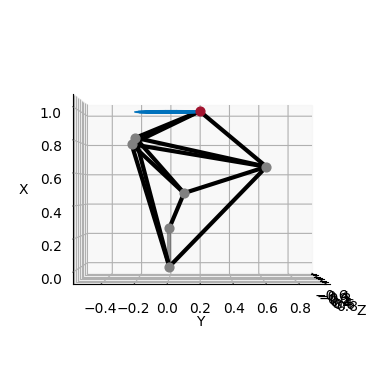

In [11]:
from src.PPM import ppm
from matplotlib import pyplot as plt
import numpy as np

def save_solidworks(PPM,theta,phi):
    with open('equations.txt', 'w') as f:
        # Loop through and save
        f.write("THETA = {}\n".format(theta))
        f.write("PHI = {}\n".format(theta))
        for i,link in enumerate(PPM.links):
            f.write("\""+link+"\" = {}\n".format(PPM.link_lengths[i]))

# Define mechanism, add noise, and save lengths for solidworks
PPM = ppm.mechanism(Lc=1,H=0.25,D=(0.25)/(0.5),G=90)
PPM.add_noise(0.05/100,12)
THETA,PHI = 25,25
PPM.theta = np.deg2rad(THETA)
PPM.phi = np.deg2rad(PHI)
save_solidworks(PPM,THETA,PHI)

# Use debug flag to check that all link lengths remain constant
PPM.update_state(debug=True)
PPM.draw()
PPM.print_params()
PPM.plot_surface()
print(PPM.N[6])
PPM.draw()


### **Sweep of P_error (100*sigma/L_char)**

In [15]:
from src.PPM import ppm
from matplotlib import pyplot as plt
import numpy as np

# Sim params
samples = 100

# Define ranges we want to look at
E_in = np.linspace(0,.3,20) # mm
Lc_scale = np.linspace(.5,3,20)
LC = 245.4617 # Measured

E_in_Lc = np.zeros(np.size(E_in)*np.size(Lc_scale)) # Input Error
E_out_Lc = np.zeros(np.size(E_in)*np.size(Lc_scale)) # Output error
count = 0

# Sweep over combinations of E_in and Lc
for e in E_in:
    for scale in Lc_scale:
            lc = LC*scale
            E = []
            E_in_Lc[count] = e/lc
            PPM = ppm.mechanism(H=scale*35.6089,D=scale*88.0696,G=144.5736,Lc=lc)
            for test in range(samples):
                try:
                    PPM.add_noise(e,test)
                    e_out,w = PPM.find_random_surface(100)
                    E.append(e_out)
                except Exception as err:
                        print(err)
            # Allow for 5% failure rate
            if len(E) == samples:
                E_out_Lc[count] = np.mean(E)/lc
            else:
                E_out_Lc[count] = np.NaN
            count += 1

### **Plot Results**

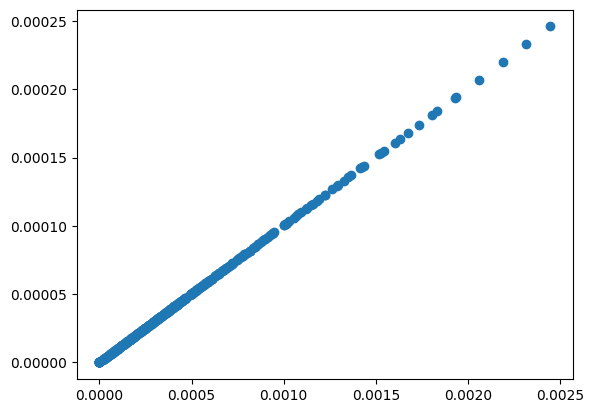

[2.77030952e-16 2.88800722e-16 2.94831575e-16 2.87991853e-16
 2.76072942e-16 2.62263613e-16 3.05357492e-16 3.07209614e-16
 2.92950369e-16 3.12238916e-16 2.84912172e-16 2.80073448e-16
 2.48197400e-16 2.92635922e-16 2.59905304e-16 2.96488236e-16
 2.89458419e-16 2.83221608e-16 2.67222587e-16 2.93423932e-16
 1.29644858e-05 1.02647818e-05 8.49567091e-06 7.24672122e-06
 6.31792482e-06 5.60016521e-06 5.02885365e-06 4.56331843e-06
 4.17667231e-06 3.85042888e-06 3.57145928e-06 3.33018242e-06
 3.11944250e-06 2.93378721e-06 2.76898936e-06 2.62172103e-06
 2.48932655e-06 2.36966089e-06 2.26097256e-06 2.16181731e-06
 2.59149710e-05 2.05204907e-05 1.69849934e-05 1.44887547e-05
 1.26322477e-05 1.11974768e-05 1.00553910e-05 9.12471938e-06
 8.35173120e-06 7.69948147e-06 7.14173072e-06 6.65932926e-06
 6.23797416e-06 5.86676709e-06 5.53725821e-06 5.24279509e-06
 4.97806896e-06 4.73879174e-06 4.52146199e-06 4.32319246e-06
 3.88537206e-05 3.07682570e-05 2.54686108e-05 2.17265008e-05
 1.89432344e-05 1.679212

In [17]:
plt.scatter(E_in_Lc,E_out_Lc)
plt.show()
print(E_out_Lc)

#### Save output

In [18]:
E = np.vstack((E_in_Lc,E_out_Lc)).T

sim_path = "ks_linear_sim.csv"

with open(sim_path, "w") as f:
    f.write("E_in,E_out,\n")
    np.savetxt(f,E,delimiter=',')

### **Test Different Types of PPMs**

A: 679.0000 B: 1006.7000 C: 1973.0000 D: 1600.3090 Lc: 2120.2387 Ht: 381.1193 Dt: 931.7687 Gt: 123.2948


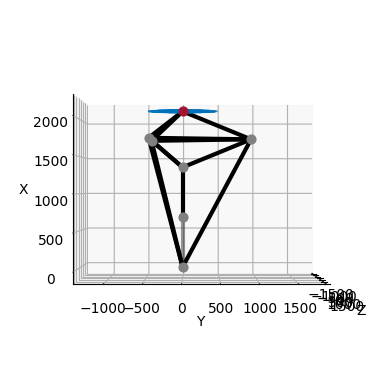

In [40]:
from src.PPM import ppm
from matplotlib import pyplot as plt
import numpy as np

ppm_dict = {"sub_optimal":ppm.mechanism(Lc=1,H=0.2525,D=(0.2525)/(0.4575),G=90),
            "optimal_build":ppm.mechanism(Lc=1,H=0.25,D=(0.25)/(0.5),G=90),
            "optimal_sim":ppm.mechanism(Lc=1,H=0.26,D=(0.26)/(0.45),G=90),
            "close_optimal":ppm.mechanism(Lc=1,H=1/4,D=(1/4)/(.5),G=91),
            "medium":ppm.mechanism(A=87.122,B=94.996,C=227.584,D=142.25),
            "medium_optimal":ppm.mechanism(Lc=245.4617,H=35.6089,D=88.0696,G=85),
            "large":ppm.mechanism(A=679,B=1006.7,C=1973,D=1600.309)}

PPM = ppm_dict["large"]

PPM.print_params()
PPM.draw()

In [41]:
# Run small batch simulation for one PPM
n_ppms = 100
noise = 0.05

Sk = np.zeros(n_ppms)

for i in range(n_ppms):
    PPM.add_noise((noise*PPM.L_char)/100,i)
    RMSE_out,r = PPM.find_random_surface(50,flip_yz=False,debug=False)
    Sk[i] = RMSE_out/PPM.RMSE_in

print("SK: {:.8f}".format(np.mean(Sk)))

SK: 0.08256667
